# Probability Distributions 

Discrete Probability Distribution -> Probability Mass Function -> Continuous form -> Probability Density Function

``` 
[ Discrete ] Probability Mass Function 
                (PMF)
                                       \
                                        \
                                         Cumulative Distribution Function
                                       /            (CDF)
                                      /
[ Continuous ] Probability Density Function 
                (PDF)                    
```

## **References**

[khanacademy](https://www.youtube.com/user/khanacademy)

[zedstatistics](https://www.youtube.com/c/zedstatistics)


## Understanding pmf and cdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython import display
import warnings

from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

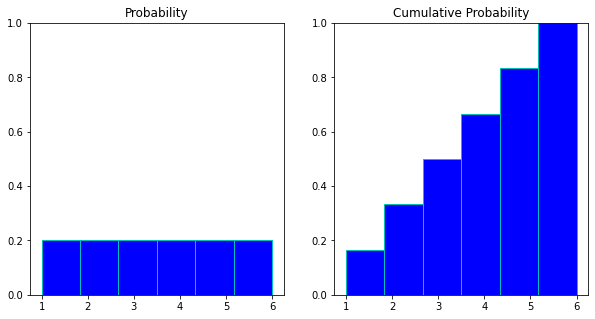

In [2]:
data = np.linspace(start=1,stop=6,num=6,dtype='int')

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].hist(data,bins=6,density=True,edgecolor='c',color='b')
ax[0].set_xticks([1,2,3,4,5,6])
ax[0].set_title("Probability")
ax[0].set_ylim([0,1])

ax[1].hist(data,bins=6,density=True,cumulative=True,edgecolor='c',color='b')
ax[1].set_xticks([1,2,3,4,5,6])
ax[1].set_title("Cumulative Probability")
ax[1].set_ylim([0,1])

plt.show()

in above chart

- probability chart of rolling a dice and cumulative probability chart of it.
- in probabaility chart every digit has same probability of appearing on the roll of dice, hence all of them are at same height.
- in cumulative prob chart evert digit(x) represents probabilities of digits<=x to appear on the roll.

like at bin 4 in cumul. prb.(rolling anything 4 or less) : p(x<=4) = p(x=1) + p(x=2) + p(x=3) + p(x=4)

## Understanding pdf and cdf

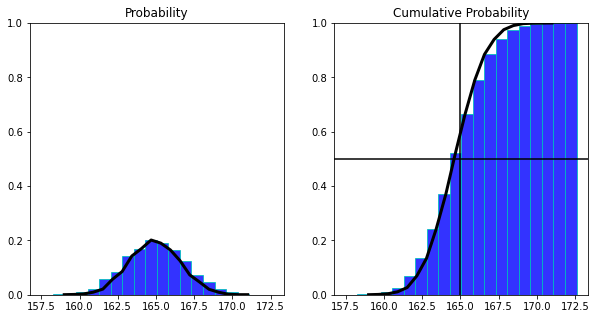

In [3]:
np.random.seed(0)
bins = 20
mu = 165
sigma = 2
data = np.random.normal(loc=mu,scale=sigma,size=5000)
x = np.linspace(mu-sigma*3,mu+sigma*3,bins)

fig,ax = plt.subplots(1,2,figsize=(10,5))

n, _, _ = ax[0].hist(data,density=True,edgecolor='c',color='b',bins=bins,alpha=0.8)
ax[0].plot(x,n,'k',lw=3)
ax[0].set_title("Probability")
ax[0].set_ylim([0,1])

n, _, _ = ax[1].hist(data,density=True,cumulative=True,edgecolor='c',color='b',bins=bins,alpha=0.8)
ax[1].plot(x,n,'k',lw=3)
ax[1].axhline(0.5,c='k')
ax[1].axvline(mu,c='k')

ax[1].set_title("Cumulative Probability")
ax[1].set_ylim([0,1])

plt.show()

in above chart

- proability distribution of heights of population with mean 165 and cumul. prob. of it on the right side.
- on the right side at 0.5 mark on y shows that 50% of population has hight less than or equal to 165 (or we have accumulated 50% of distribution till 165)

probability density function f(x) $\leftarrow \frac{\partial F{x}}{\partial x} \leftarrow$ cumulative probability function F(x)

probability density function f(x) $\rightarrow \int_{-\infty}^{x} f(x) dx = F(x) \rightarrow$ cumulative probability function F(x)

| Distribution Type | Examples |
| ----------------- | ----------- |
| Continuous Distribution | Normal(Gaussian) | 
|| Chi-Sqaure | 
|| F |
|| T |
|| Uniform |
| Discrete Distribution | Binomial |
|| Poisson |
|| Exponential |
|| Weibull |
|| Hypergeometric |
|| Multinomial | 
|| Negative Binomial |


| scipy function | description |
|-----|------------------------------------|
| pdf | Probability density function |
| pmf | Probability mass function | 
| cdf | Cumulative distribution function |
| ppf | percent point function |
| sf | Survival function (1 – cdf) |
| rvs | Creating random samples from a distribution.(random variable samples) |


## Normal(Gaussian) Distribution (Continuous)

- the normal distribution is by far the most important probability distribution. One of the main reasons for that is the Central Limit Theorem (CLT) 
- area under the curve(AUC) = 1

- say x $\in R$, x is distributed Gaussian with mean $\mu$ , variance $\sigma^2$, standard deviation $\sigma$
    

\begin{align}
    x &\sim N(\mu, \sigma^2) \text{, where}\\
    pdf(x) &= \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)\\
    \mu &= \frac{1}{m}\sum_{i=1}^{m}x^{(i)}\\
    \sigma &=  \frac{1}{m}\sum_{i=1}^{m}(x^{(i)} - \mu)^2
\end{align}

In [4]:
data = np.linspace(start=0, stop=100, num=1000)

In [5]:
from scipy.stats import norm

norm = norm(loc=50, scale=10)
mean,var,skew,kurtosis = norm.stats(moments="mvsk")
std = np.sqrt(var)

print(mean,var,skew,kurtosis)

50.0 100.0 0.0 0.0


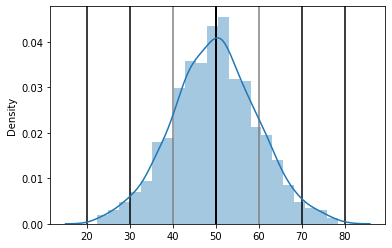

In [6]:
fig,ax = plt.subplots(1,1)
ax.axvline(mean, c='k', lw=2)
ax.axvline(mean-std, c='grey')
ax.axvline(mean+std, c='grey')
ax.axvline(mean-std*2, c='k')
ax.axvline(mean+std*2, c='k')
ax.axvline(mean-std*3, c='k')
ax.axvline(mean+std*3, c='k')
sns.distplot(norm.rvs(1000), kde=True)
plt.show()

- 68% within 1 standard deviation.
- 98% within 2 standard deviation.
- 99.7% within 3 standard deviation.

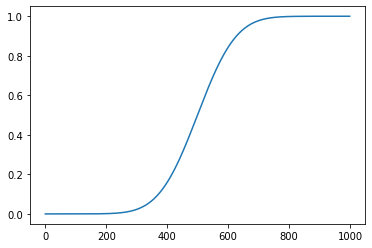

In [7]:
plt.plot(norm.cdf(data))
plt.show()

this one is just to check how rvs works. creating random variable samples.

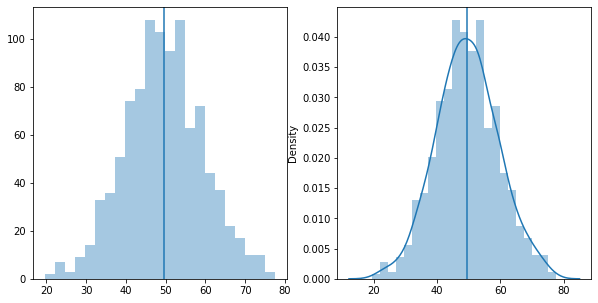

In [8]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
data = norm.rvs(1000,random_state=0)

ax[0].axvline(np.mean(data))
sns.distplot(data,kde=False,ax=ax[0])

ax[1].axvline(np.mean(data))
sns.distplot(data,kde=True,ax=ax[1])
plt.show()

### Standard normal distriution (z distribution)

- normal distribution with mean = 0 and standard deviation = 1.

<AxesSubplot:ylabel='Density'>

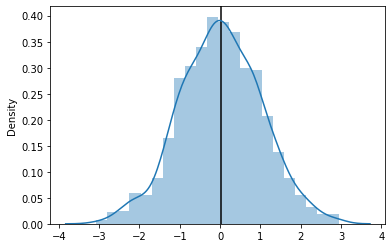

In [9]:
snd = np.random.normal(loc=0,scale=1,size=1000)

plt.axvline(snd.mean(),color='k')
sns.distplot(snd)

### Coverting to z-scores (Standardization/ Normalization)

Converting data to z-scores(normalizing or standardizing) doesn't convert the data to normal distribution, it just puts the data in the same scale as standard normal distribution. 

- **Normalization Process** subtract mean and devide by the standard deviation. $z = \frac{x - \bar{x}}{\sigma}$

<AxesSubplot:ylabel='Density'>

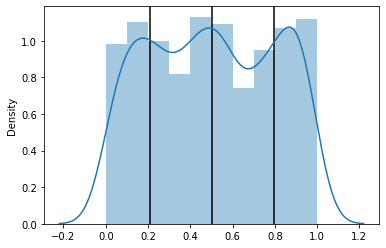

In [10]:
data = np.random.rand(1000)

plt.axvline(data.mean(),color='k')
plt.axvline(data.mean() - data.std(),color='k')
plt.axvline(data.mean() + data.std(),color='k')

sns.distplot(data)

In [11]:
z_scores = (data - data.mean()) / data.std(ddof=1)

z_scores.mean(),z_scores.std(ddof=1)

(-2.6290081223123706e-16, 1.0)

<AxesSubplot:ylabel='Density'>

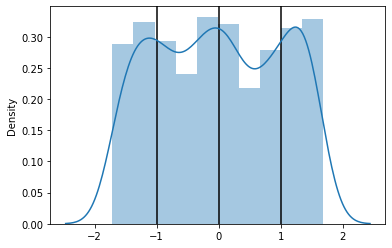

In [12]:
plt.axvline(z_scores.mean(),color='k')
plt.axvline(z_scores.mean() - z_scores.std(),color='k')
plt.axvline(z_scores.mean() + z_scores.std(),color='k')
sns.distplot(z_scores)

### Method to calculate auc with z-score

Why the hell would I calculate z-score? `TBD`

- !pip install --no-cache-dir git+https://github.com/NishantBaheti/graphpkg

In [13]:
mu = 75
sigma = 10

bell_curve_data = np.random.normal(loc=mu,scale=sigma,size=(10000,))


    Min     :   38.057147077212285 
    Max     :   110.98310102305439 
    Median  :   74.90401793747884 
    Mode    :   ModeResult(mode=array([38.05714708]), count=array([1])) 
    Mean    :   74.99552606711973 
    Std dev :   9.906804817099255   
    


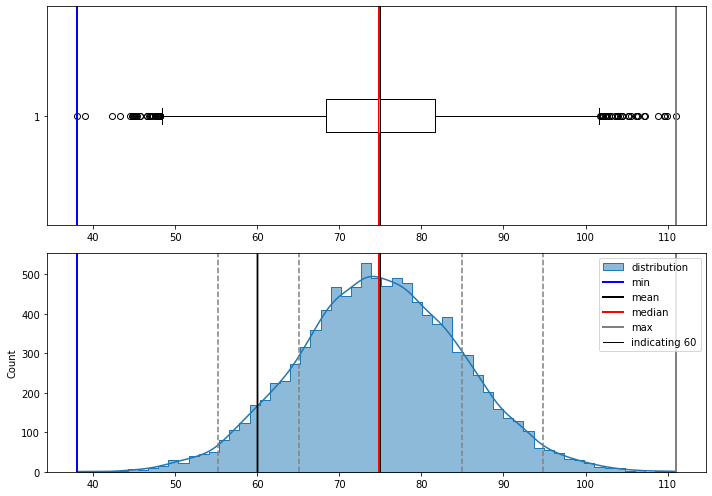

In [14]:
from graphpkg.static.utils import plot_distribution

plot_distribution(bell_curve_data,indicate_data=[60],figsize=(10,7))

- in the curve above i can see. i need to find z-score(area under the curve from left side only) for -1.49.
- so lets look at the z score table

<img src="ZValue.png">

### z-score table

This table tells us area under the curve(probability in this case) based on z-score.

<img src="NegativeZValues.png"/>



<img src="PositiveZValues.png"/>


- we need negative 1.49
- so from top to bottom i'll select -1.4 
- and from left to right i'll select 0.09
- i get 0.06811


    Min     :   -2.693477658187908 
    Max     :   3.321601166647714 
    Median  :   -0.026861025439324573 
    Mode    :   ModeResult(mode=array([-2.69347766]), count=array([1])) 
    Mean    :   -0.032810027367517494 
    Std dev :   0.9819687703292147   
    


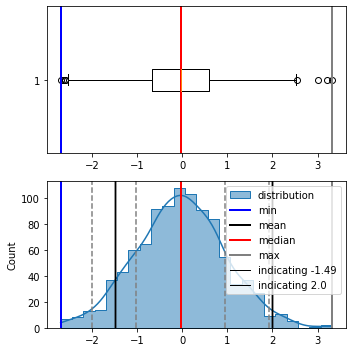

In [15]:
data = np.random.normal(loc=0,scale=1,size=1000)
plot_distribution(data,indicate_data=[-1.49, 2.0])

here in the diagram, area under the curve on the left side from -1.49 is 0.06811(6.8%) and 2.0 is 0.9772(97.72%). and this is correct also as -1.49 doesnt have a lot of data on the left side of it.

In [16]:
from scipy import stats

stats.norm.ppf(0.06811) #percent point function

-1.4900161102718568

In [17]:
stats.norm.ppf(0.9772)

1.9990772149717693

### Central limit theorem

- The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the `sample means` will be approximately normally distributed (we can use normal distribution statistic).
- simply for a population, increase number of samples then distribution moves towards normal distribution.
- Central limit theorem allows normal-approximation formulas like t-distribution to be used in calculating sampling distributions for inference ie confidence intervals and hypothesis tests.


    Min     :   0.00034494409119278924 
    Max     :   0.9998556266062902 
    Median  :   0.5058725592216615 
    Mode    :   ModeResult(mode=array([0.00034494]), count=array([1])) 
    Mean    :   0.49948958836972196 
    Std dev :   0.288386913695571   
    


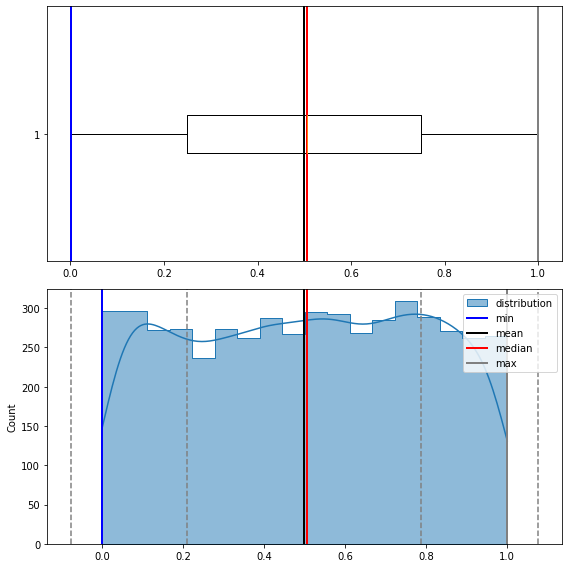

In [18]:
pop_size = 5000

population = np.random.rand(pop_size)

plot_distribution(population,figsize=(8,8))

As it is visible that population is not normally distributed.

Now lets generate random sample from the iterations, calculate there means, and plot them iteration by iteration, 
`although population wasn't normally distributed but according to CENTRAL LIMIT THEOREM means of resamples should be normally
distributed`.

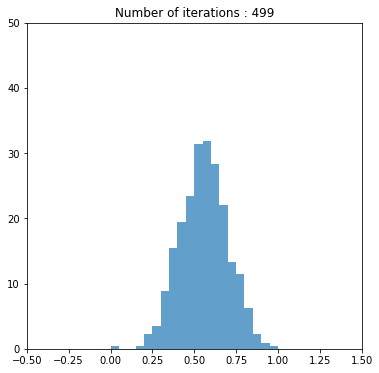

In [19]:
bins = 20
resampling_iterations = 500

sample_size = 500
sample = np.random.choice(population,size=sample_size)

sample_means = []
# sample_means.append(sample.mean())


fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot()

ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(0, 50)

_, _, container = ax1.hist(sample_means,bins=bins,density=True,alpha=0.7)

def draw_frame(n):
    sample = np.random.choice(population,size=sample_size)
    sample_means.append(sample.mean())

    heights, _ = np.histogram(sample_means, bins =bins, normed=True)
    for height,rect in zip(heights,container.patches):
        rect.set_height(height)
    ax1.set_title(f"Number of iterations : {n}")
    
    return container.patches

anim = animation.FuncAnimation(fig, draw_frame, frames=resampling_iterations, interval=100, blit=True)

display.HTML(anim.to_html5_video())

## Long Tailed Distribution (Continuous)

**Tail** long narrow portion of a frequency dist. extreme values occur at low frequency.

most data is not normally distribution.

## Chi-squared Distribution (Continuous)

- if a random variable $Z$ has standard normal distribution then $Z_1^2$ has the $\chi^2$ distribution with one degree of freedom
- if a random variable $Z$ has standard normal distribution then $Z_1^2 + Z_2^2$ has the $\chi^2$ distribution with two degree of freedom
- if $Z_1,Z_2,...,Z_k$ are independent standard normal (distribution) random variables then $Z_1^2 + Z_2^2 + ... + Z_k^2$ has the $\chi^2$ distribution with k degrees of freedom


All these are actually explained below.

\begin{align}   
    \text{Probability density function }f(x,k) =
    \begin{cases} \frac{1}{2^{(k/2)} \Gamma{(k/2)}} . x^{(k/2) -1}. e^{(-x/2)}  & \text{for } x \ge 0\\
        0 & else \end{cases}
\end{align}


Where 

k = degree of freedom


Gamma func $\Gamma(x)=(x-1)!$

### Detailed intuition

`Can be thought of as the square of selection taken from a standard normal distribution`
Derivation $\chi_k^2 = \sum_{i=1}^k Z_i^2$

### 1 dof

 $\chi^2 = Z_1^2$

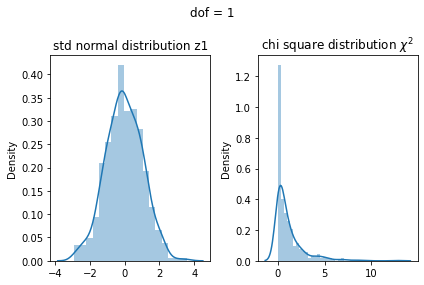

In [20]:
z1 = np.random.normal(size=500)

X1 = z1**2

fig,ax = plt.subplots(1,2)

sns.distplot(z1,ax=ax[0])
ax[0].set_title("std normal distribution z1")

sns.distplot(X1,ax=ax[1])
ax[1].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 1")
plt.tight_layout()
plt.show()

### 2 dof

$\chi^2= Z_1^2 + Z_2^2$ 

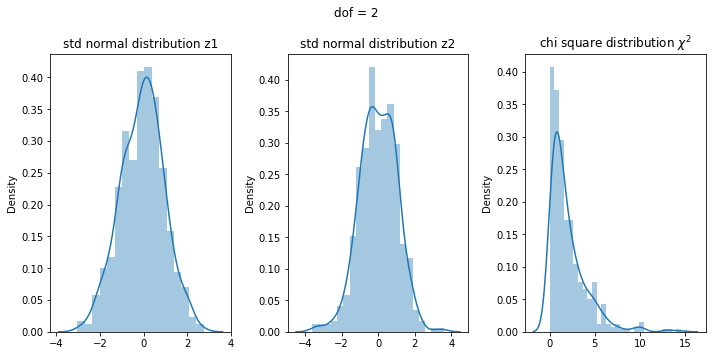

In [21]:
z1 = np.random.normal(size=500)
z2 = np.random.normal(size=500)

X2 = z1**2 + z2**2

fig,ax = plt.subplots(1,3,figsize=(10,5))

sns.distplot(z1,ax=ax[0])
ax[0].set_title("std normal distribution z1")

sns.distplot(z2,ax=ax[1])
ax[1].set_title("std normal distribution z2")


sns.distplot(X2,ax=ax[2])
ax[2].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 2")
plt.tight_layout()
plt.show()

### 3 dof
 $\chi^2 = Z_1^2 + Z_2^2 + Z_3^2$

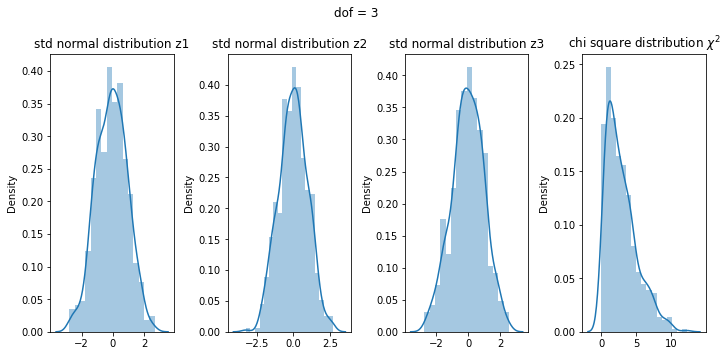

In [22]:
z1 = np.random.normal(size=500)
z2 = np.random.normal(size=500)
z3 = np.random.normal(size=500)


X3 = z1**2 + z2**2 + z3**2

fig,ax = plt.subplots(1,4,figsize=(10,5))

sns.distplot(z1,ax=ax[0])
ax[0].set_title("std normal distribution z1")

sns.distplot(z2,ax=ax[1])
ax[1].set_title("std normal distribution z2")

sns.distplot(z3,ax=ax[2])
ax[2].set_title("std normal distribution z3")


sns.distplot(X3,ax=ax[3])
ax[3].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 3")
plt.tight_layout()
plt.show()

### Comparing all three dof

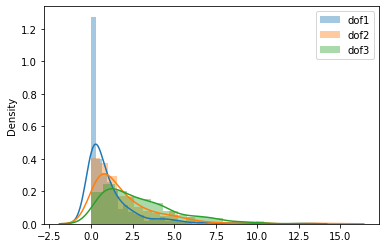

In [23]:
sns.distplot(X1, label='dof1')
sns.distplot(X2, label='dof2')
sns.distplot(X3, label='dof3')

plt.legend()
plt.show()

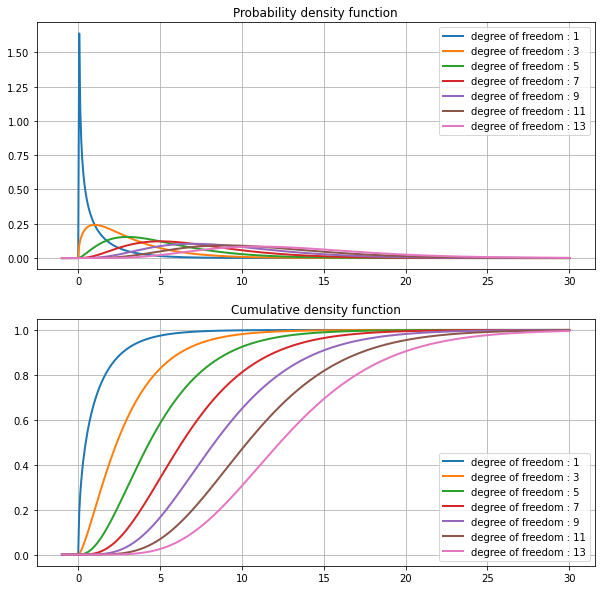

In [24]:
from scipy.stats import chi2

fig,ax = plt.subplots(2,1,figsize=(10,10))
data = np.linspace(start=-1, stop=30, num=500)
for dof in range(1, 15, 2):
    chi2_dist = chi2(dof)
    ax[0].plot(data,chi2_dist.pdf(data),label=f"degree of freedom : {dof}",lw=2)
    ax[1].plot(data,chi2_dist.cdf(data),label=f"degree of freedom : {dof}",lw=2)
    
ax[0].legend(loc="best")
ax[0].grid()
ax[0].set_title("Probability density function")

ax[1].legend(loc="best")
ax[1].grid()
ax[1].set_title("Cumulative density function")

plt.show()

### Chi-square table

this table includes data point, area under the curve(first row) and degree of freedom(first column).

The areas given across the top are the `areas to the right` of the critical value. To look up an area on the left, subtract it from one, and then look it up (ie: 0.05 on the left is 0.95 on the right)

ref = https://people.richland.edu/james/lecture/m170/tbl-chi.html

<img src="chi-square.png" />

<iframe src='https://people.richland.edu/james/lecture/m170/tbl-chi.html' width="100%" height=500 >Chi Squared Table </iframe>

Ref : https://people.richland.edu/james/lecture/m170/tbl-chi.html

### degree of freedom 1 

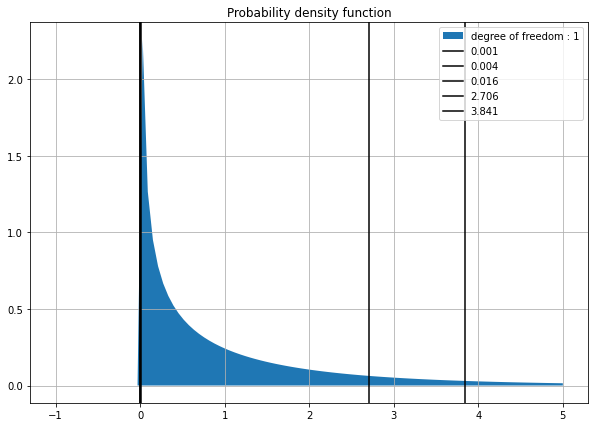

In [25]:

fig,ax = plt.subplots(1,1,figsize=(10,7))
data = np.linspace(start=-1, stop=5, num=100)

dof = 1
chi2_dist = chi2(dof)
ax.fill_between(data,chi2_dist.pdf(data),label=f"degree of freedom : {dof}",lw=2)

for i in [0.001,0.004,0.016,2.706,3.841]:
    ax.axvline(i, c='k', label=i)

ax.legend(loc="best")
ax.grid()
ax.set_title("Probability density function")

plt.show()

from above plot we can see that 
```
0.001   0.004     0.016     2.706     3.841 values are specifying 
0.975     0.95     0.90     0.10       0.05  AUC of the right side of the curve.
(picked values from table above)
```

### degree of freedom 5

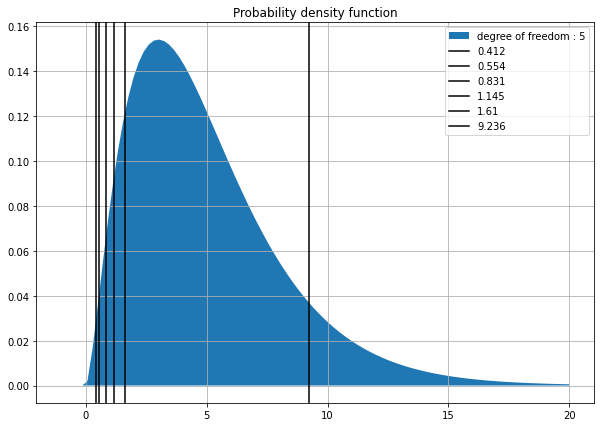

In [26]:

fig,ax = plt.subplots(1,1,figsize=(10,7))
data = np.linspace(start=-1, stop=20, num=100)

dof = 5
chi2_dist = chi2(dof)
ax.fill_between(data,chi2_dist.pdf(data),label=f"degree of freedom : {dof}",lw=2)

for i in [0.412,0.554,0.831,1.145,1.610,9.236]:
    ax.axvline(i, c='k', label=i)

ax.legend(loc="best")
ax.grid()
ax.set_title("Probability density function")

plt.show()

similarly in plot above
```
        values             0.412	0.554	0.831	1.145	1.610	9.236
        AUC(right side)    0.995    0.99    0.975    0.95     0.90    0.10	
```

## Student's t distribition (Continuous)

- Small sample statistics.
- Underlying distribution is normal.
- Unknown population standard normal distribution.
- Sample size too small to apply Central limit theorem.
- Normally shaped distribution but thicker and long tails.
- As degree of freedom increases t distribution tends towards the standard normal distribution.


> Z has standard normal distribution, U has the $\chi^2$ distribution with $\nu$ degree of freedom. Z and U are independent.

\begin{align}
    t &= \frac{Z}{\sqrt{\frac{U}{\nu}}} \text{ has the t distribution with }\nu \text{ degree of freedom}\\
    Z &= \frac{x - \mu}{\sigma}\\
    \\
    \text{ pdf }f(x, \nu) &= \frac{\Gamma (\frac{\nu + 1 }{2})}{\sqrt{\pi \nu} \Gamma (\frac{\nu}{2})}(1+ \frac{x^2}{\nu})^{-\frac{(\nu + 1)}{2}}\\
    \\\nu &= n-1\\
    \\
    \mu &= 0 \text{ for } \nu < 1\\
    \\
    \sigma^2 &= \frac{\nu}{\nu - 2} for {\nu} > 2\\
    \Gamma(x) &= (x-1)! \text{ Gamma Function}
\end{align}

Ref : https://en.wikipedia.org/wiki/Student%27s_t-distribution



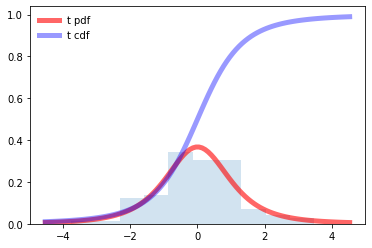

In [27]:
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
df = 3
size = 100
mean, var, skew, kurt = t.stats(df, moments='mvsk')

x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), size)

ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')
ax.plot(x, t.cdf(x, df),'b-', lw=5, alpha=0.4, label='t cdf')

ax.hist( t.rvs(df, size=size), density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

demonstraion on increasing degrees of freedom, t distribution approaches towards normal distribution.
and it seems correct also as by increasing degrees of freedom ($\nu$ = n - 1) we are increasing the sample size also.

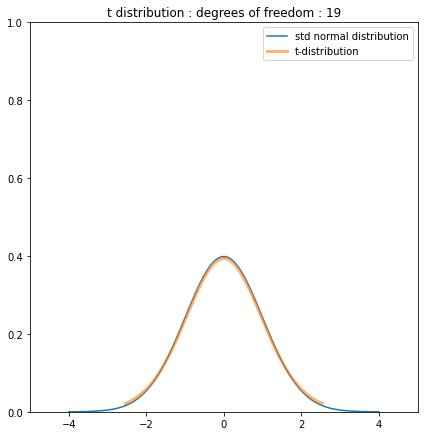

In [28]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot()

ax1.set_xlim(-5, 5)
ax1.set_ylim(0, 1)
d = np.linspace(-4,4,100)

ax1.plot(d,stats.norm.pdf(d),label="std normal distribution")
plot1, = ax1.plot([],[],lw=3, alpha=0.6,label="t-distribution")
plt.legend(loc='best')
plt.tight_layout()
def draw_frame(n):
    
    df = n
    mean, var, skew, kurt = t.stats(df, moments='mvsk')

    x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 1000)
    plot1.set_data(x, t.pdf(x, df))
    ax1.set_title(f"t distribution : degrees of freedom : {n}")
    return (plot1,)

anim = animation.FuncAnimation(fig, draw_frame, frames=20, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

### t table

t table here shows degrees of freedom and cumulative distribution, probability distribution(one tail, two tails) and gives t-statistic.

<iframe src="https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf" width="100%" height=500>t table</iframe>

<img src='t_table.png' />

Ref : https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

Lets say we need to know what t-statistic with 4 df provides 2.5% in upper tail ? or we need to know the point above which lies 2.5% of the distribution.

the table tells us AUC. so actually we need to find the auc after the 2.5%(0.025) = 1 - 0.025 = 0.975

so either $t_{0.975}$ or one tail 0.025. in table above for df 4 and given inputs then t-statistic = 2.776

or use scipy

In [29]:
stats.t.ppf(0.975,4)

2.7764451051977987

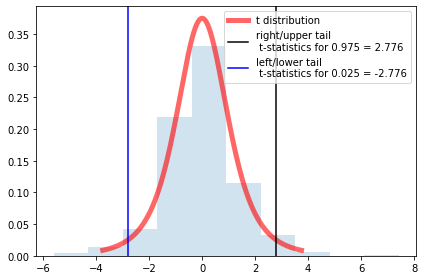

In [30]:
np.random.seed(10)
fig, ax = plt.subplots(1, 1)
df = 4
size = 500
p = 0.025 #2.5%

mean, var, skew, kurt = t.stats(df, moments='mvsk')

x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), size)

ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t distribution')
ax.hist(t.rvs(df, size=size), density=True, histtype='stepfilled', alpha=0.2)

right_t_stat = stats.t.ppf(1 - p,df)
left_t_stat = stats.t.ppf(p,df)
ax.axvline(right_t_stat,c='k', label=f'right/upper tail \n t-statistics for {1-p} = {right_t_stat:.3f}')
ax.axvline(left_t_stat,c='b', label=f'left/lower tail \n t-statistics for {p} = {left_t_stat:.3f}')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

because of the symmetry values are same for left and right just the sign is opposite.

`in the center actually it is showing 95% distribution (100 - 2.5 - 2.5)`

## F Distribution (Continuous)

suppose $U_1$ has $\chi^2$ distribution with $df_1$ degrees of freedom \
and $U_2$ has $\chi^2$ distribution with $df_2$ degrees of freedom \
then $F=\frac{\frac{U_1}{df_1}}{\frac{U_2}{df_2}}$ has an F distribution


In [31]:
from scipy.stats import f

dfn, dfd = 29, 18 #degree of fre
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

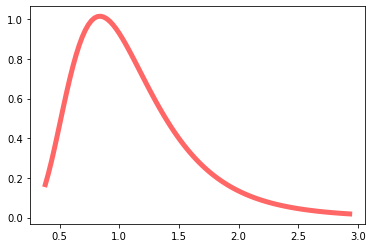

In [32]:
x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
plt.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

## Uniform Distribution (Continuous)

A continuous random variable X is said to have a Uniform distribution over the interval [a,b], shown as 

\begin{align}
    X &\sim U(a,b) \text{ if its PDF is given by}\\ 
    f(x) &= \begin{cases}
                \frac{1}{b-a} && a \le x \le b\\ 
                0 && \text{ else}\\
            \end{cases}\\ 
    \mu &= \frac{a+b}{2}\\
    \sigma^2 &= \frac{1}{12}{(b-a)^2}
\end{align}

In [33]:
from scipy.stats import uniform

uniform_dist = uniform(loc=50,scale=10)

In [34]:
mean, var, skew, kurt = uniform_dist.stats(moments='mvsk')
mean, var, skew, kurt

(array(55.), array(8.33333333), array(0.), array(-1.2))

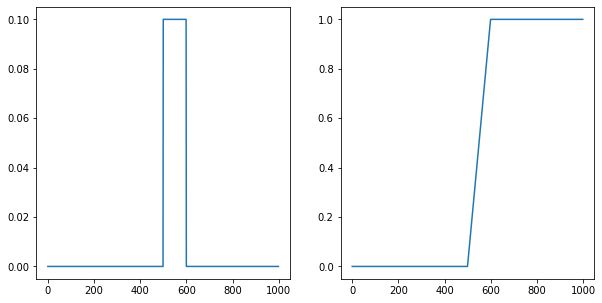

In [35]:
data = np.linspace(start=0, stop=100, num=1000)

fig,ax = plt.subplots(1,2,figsize=(10,5))


ax[0].plot(uniform_dist.pdf(data))

ax[1].plot(uniform_dist.cdf(data))
plt.show()

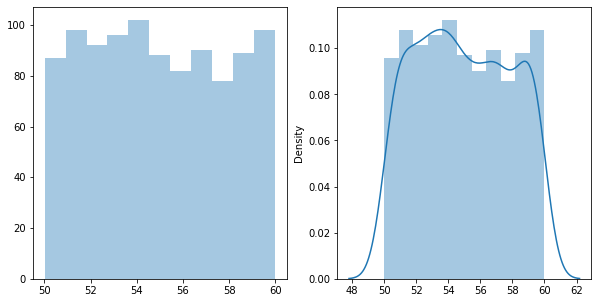

In [36]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(uniform_dist.rvs(1000,random_state=0),kde=False,ax=ax[0])
sns.distplot(uniform_dist.rvs(1000,random_state=0),kde=True,ax=ax[1])
plt.show()

## Binomial Distribution (Discrete)

**Trial** An event with a discrete outome.\
**Binomial** two outcomes\
**Binomial trial** Trial with two outcomes.(Bernoulli trial)\
**Binomial distribution** Distribution of number of successses in n trials.(Bernoulli distribution)

- n repeated trials
- 2 outcomes only
- probability of success = p
- independent trials

x = number of success results\
n = number of trials\
p = probability of success\
q = (1 - p) failure

The frequency distribution of the possible number of successful outcomes in a given number of trials, where the probability of success is same in each of them.

\begin{align}
    b(x;n,p) &= \binom{n}{x}{p^x}{(1-p)}^{(n-x)}\\
    \mu &= np\\
    \sigma^2 &= npq
\end{align}

`It is conventional in statistics to term the “1” outcome the success outcome; it is also common practice to 
assign “1” to the more rare outcome. Use of the term success does not imply that the outcome is desirable or beneficial,
but it does tend to indicate the outcome of interest.`

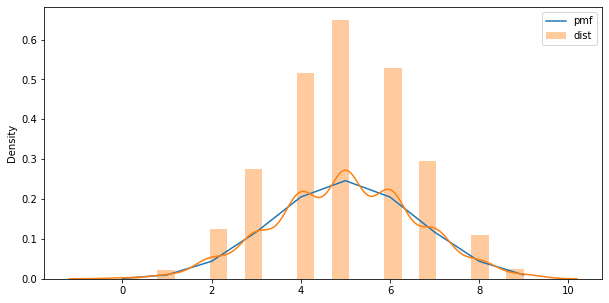

In [37]:
from scipy.stats import binom
## n and p as shape parameters 
n,p = 10, 0.5 # number of trials 10 and 0.5 success rate(single success)
binom_dist = binom(n=n, p =p)
data = range(n)
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(binom_dist.pmf(data), label='pmf')
sns.distplot(binom_dist.rvs(1000,random_state=1), label="dist")
plt.legend()
plt.show()

because p(sucess rate) = 0.5 (50%), so in the graph it is visible that in 10 trials, getting around 5 successes has high probability, in same way getting only 2(<5) or getting 8(>5) successes has a very low probability.

now lets take only 0.2(20%) success rate.

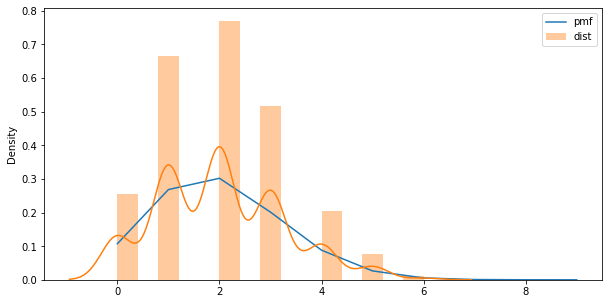

In [38]:
n,p = 10, 0.2 # number of trials 10 and 0.5 success rate(single success)
binom_dist = binom(n=n, p =p)
data = range(n)
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(binom_dist.pmf(data), label='pmf')
sns.distplot(binom_dist.rvs(1000,random_state=1), label="dist")
plt.legend()
plt.show()

but for a large data set(big n) p is neither close to 0 or 1. the binomial distribution can be approximated by normal distribution. see below.

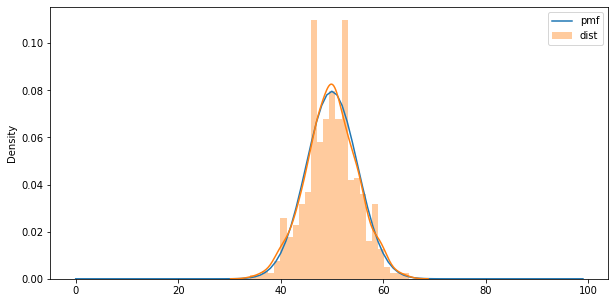

In [39]:
n,p = 100, 0.5 # number of trials 10 and 0.5 success rate(single success)
binom_dist = binom(n=n, p =p)
data = range(n)
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(binom_dist.pmf(data), label='pmf')
sns.distplot(binom_dist.rvs(1000,random_state=1), label="dist")
plt.legend()
plt.show()

## Hypergeometric Distribution (Discrete)

- Discrete distribution
- Equivalent to the binomial distribution but `without replacement`.
- here card playing analogy comes in picture as if one card is drawn from the deck then proabilities are changed for all the other cards to be drawn next. If the card is again put in deck then all cards to be drawn has same prob again and it converts into `binomial`.

$pmf(x,N,A,n) = \frac{\binom{A}{x} \binom{N-A}{n-x}}{\binom{N}{n}}$

N = total population size\
A = total item of interest in population\
n = sample size\
x = items of intereset in sample


for scipy 

M = total population size\
n = total item of interest in population\
N = sample size\
x = items of intereset in sample


scenario is probability distribution of number pf spades in a 5 card poker game.

total population size = 52\
total item of interest in population = 13 (number pf spades)\
sample size = 5\
items of intereset in sample = rangin from 0 to 5



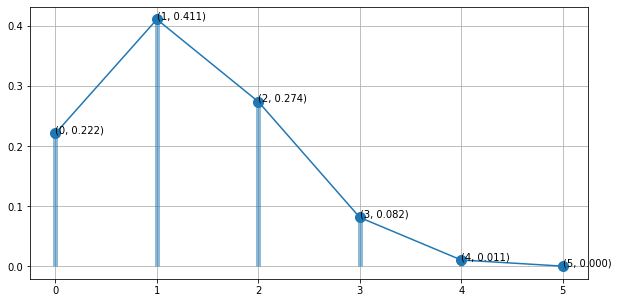

In [40]:
from scipy import stats

hypergeom_obj = stats.hypergeom(M=52,n=13,N=5)


fig, ax = plt.subplots(1, 1,figsize=(10,5))

x = range(6)
y_pmf = hypergeom_obj.pmf(x)

ax.plot(y_pmf,'o-',ms=10)
ax.vlines(x,0,y_pmf,lw=5,alpha=0.5)

ax.set_xticks(x)

for xy in zip(x,y_pmf):
    ax.annotate(f"({xy[0]}, {xy[1]:.3f})", xy=xy, textcoords='data')

plt.grid()
plt.show()


lets say the question is what is the probability of drawing 2 spades in 5 card poker game.\
now x = 2

from graph\
when x = 2\
pmf(X=2) = 0.274


## Poisson Distribution (Discrete)

French dude did a bunch of things in stats

- Events occuring in a fixed time interval or region of oppotunity.
- only needs one parameter, expected number of events per region/time interval $\lambda$
- Average number of successes($\mu$) that occurs in a specified region is known
- Unlike binomial distribution, Poisson continues to go on forever, hence distributioon is bounded by 0 and $\infty$

So we have assumptions also

* The rate at which event occur is constant.
* events are independent(one event doesn't affect other events)


$pmf(x;\mu) = e^{-\mu} \frac{\mu^x}{x!}$

or 

$pmf(x;\lambda) = e^{-\lambda} {\frac{\lambda^x}{x!}}$


e = 2.718 \
$\mu$ or $\lambda$ = mean number of successes \
x = actual number of successes

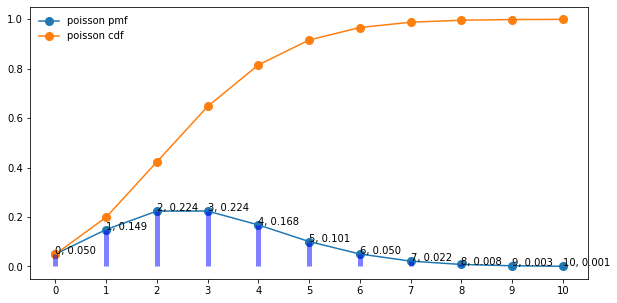

In [41]:
from scipy.stats import poisson

fig, ax = plt.subplots(1, 1,figsize=(10,5))

mu = 3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(0,11)
y_pmf = poisson.pmf(x, mu)
y_cdf = poisson.cdf(x, mu)
ax.plot(x, y_pmf, '-o', ms=8, label='poisson pmf')
ax.plot(x, y_cdf, '-o', ms=8, label='poisson cdf')

ax.vlines(x, 0, y_pmf, colors='b', lw=5, alpha=0.5)

for xy in zip(x,y_pmf):
    ax.annotate(f"{xy[0]}, {xy[1]:.3f}", xy=xy, textcoords='data')

ax.set_xticks(x)
ax.legend(loc='best', frameon=False)

plt.show()

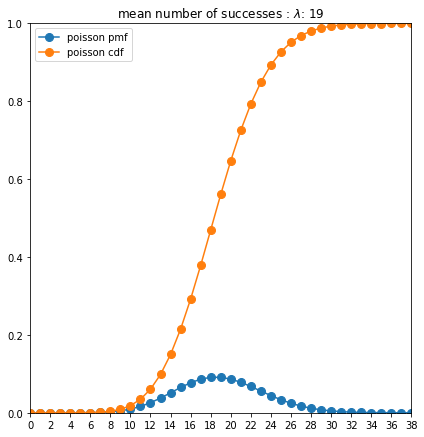

In [42]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot()

l = 20

ax1.set_xlim(0, l)
ax1.set_ylim(0, 1)
x = np.arange(0,l*2)

plot1, =ax1.plot([], [], '-o', ms=8, label='poisson pmf')
plot2, =ax1.plot([], [], '-o', ms=8, label='poisson cdf')

ax1.set_xticks(x[::2])
plt.legend(loc='best')
plt.tight_layout()
def draw_frame(n):
    mu = n
    y_pmf = stats.poisson.pmf(x, mu)
    y_cdf = stats.poisson.cdf(x, mu)
    plot1.set_data(x,y_pmf)
    plot2.set_data(x,y_cdf)
    ax1.set_title(f"mean number of successes : $\lambda$: {n}")
    return (plot1,plot2,)

anim = animation.FuncAnimation(fig, draw_frame, frames=l, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

so here is a question from zed

there is a website with a feature to but stuff online. Now the study is between number of clicks vs those clicks leading to an actual sale.
now lambda or mu or mean click thorugh sales per day is 12.
1. exactly 10 click through sales in a day.
2. at least 10 click through sales in a day.

in below graph we can see

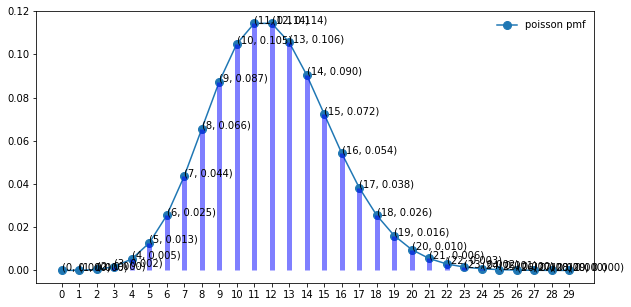

In [43]:
fig, ax = plt.subplots(1, 1,figsize=(10,5))

mu = 12
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(0,30)
y_pmf = poisson.pmf(x, mu)
y_cdf = poisson.cdf(x, mu)
ax.plot(x, y_pmf, '-o', ms=8, label='poisson pmf')

ax.vlines(x, 0, y_pmf, colors='b', lw=5, alpha=0.5)

for xy in zip(x,y_pmf):
    ax.annotate(f"({xy[0]}, {xy[1]:.3f})", xy=xy, textcoords='data')

ax.set_xticks(x)
ax.legend(loc='best', frameon=False)

plt.show()

- exactly 10 click through sales in a day = 0.105

In [44]:
y_pmf[10],poisson.pmf([10],mu=12)

(0.10483725588365922, array([0.10483726]))

- at least 10 click through sales in a day 

In [45]:
y_pmf[10:].sum(), poisson.pmf(range(10,30),mu=12).sum()

(0.7575989681906888, 0.7575989681906888)

but here the assumption is rate at which these events(clicks) are occuring is constant. In real world I don't think it can be regulated/ or profitable to regulate clicks per time interval.

## Exponential Distribution (Discrete)

- The time between events in a Poisson process ('inverse' of Poisson)

| Poisson | Exponential |
|---------|-------------|
| Number of cars passing a tollgate in one hour. | Number of hours between car arrivals. |


$pdf(x;\lambda) = \begin{cases}
\lambda  e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

$\lambda$ = rate(inverse scale) parameter/ exponentiation parameter.

or 

$pdf(x;\beta) = \begin{cases}
\frac{1}{\beta}  e^{-\frac{x}{\beta}} & x \ge 0, \\
0 & x < 0.
\end{cases}$

$\beta$ = scale parameter.


$\lambda = \frac{1}{\beta}$

Ref : https://en.wikipedia.org/wiki/Exponential_distribution

In [46]:
class ExpDist:
    def __init__(self,lambd):
        self.lambd = lambd
        
    def pdf(self,x):
        return (self.lambd * (np.exp(-self.lambd * x))) * (x>=0)
    
    def cdf(self,x):
        return (1 - np.exp(-self.lambd * x)) * (x>=0)

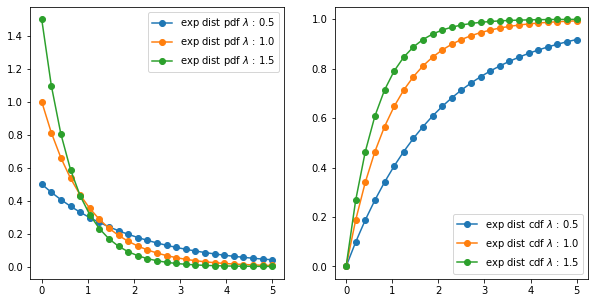

In [47]:
x = np.linspace(0,5,25)
x_tick_s = np.linspace(0,5,6)
fig, ax = plt.subplots(1, 2,figsize=(10,5))

for l in np.arange(0.5,2,0.5):
 
    y_pdf = ExpDist(l).pdf(x)
    
    ax[0].plot(x,y_pdf,'o-', label=f'exp dist pdf $\lambda$ : {l}')
    ax[0].set_xticks(x_tick_s)
    ax[0].legend()
    
    
for l in np.arange(0.5,2,0.5):
 
    y_cdf = ExpDist(l).cdf(x)
    
    ax[1].plot(x,y_cdf,'o-', label=f'exp dist cdf $\lambda$ : {l}')
    ax[1].set_xticks(x_tick_s)
    ax[1].legend()
    
plt.show()

## Weibull Distribution (Discrete)

the event rate does not remain constant over time. If the period
over which it changes is much longer than the typical interval between events,
there is no problem; you just subdivide the analysis into the segments where rates
are relatively constant, as mentioned before.

The Weibull distribution is an extension of the
exponential distribution, in which the event rate is allowed to change, as specified
by a shape parameter k.

$f(x;\beta,k) =
\begin{cases}
\frac{k}{\beta}\left(\frac{x}{\beta}\right)^{k-1}e^{-(x/ \beta)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases}$

or

$f(x;\lambda,k) =
\begin{cases}
k{\lambda} \left({\lambda}{x}\right)^{k-1}e^{-(\lambda x)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases}$

a or $\lambda$ is the exponentiation parameter.

$\frac{1}{\beta}$ is the scale parameter.

c or $k$ is the shape parameter of the non-exponentiated Weibull law.

In [48]:
from scipy import stats

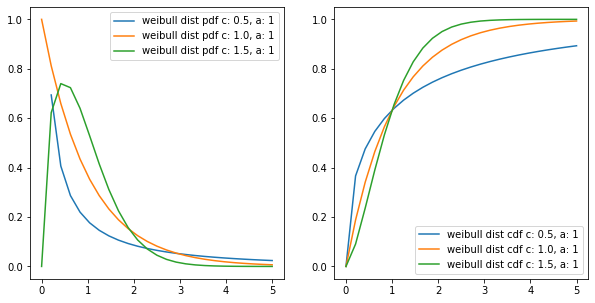

In [49]:
x = np.linspace(0,5,25)
x_tick_s = np.linspace(0,5,6)
fig, ax = plt.subplots(1, 2,figsize=(10,5))

for i in np.arange(0.5,2,0.5):
 
    y_pdf = stats.exponweib.pdf(x,a=1,c=i)
    
    ax[0].plot(x,y_pdf,'-', label=f'weibull dist pdf c: {i}, a: 1')
    ax[0].set_xticks(x_tick_s)
    ax[0].legend()
    
    
for i in np.arange(0.5,2,0.5):
 
    y_cdf = stats.exponweib.cdf(x,a=1,c=i)
    
    ax[1].plot(x,y_cdf,'-', label=f'weibull dist cdf c: {i}, a: 1')
    ax[1].set_xticks(x_tick_s)
    ax[1].legend()
    
plt.show()

interestingly if we put c or k = 1

then $f(x;\lambda) = \lambda e^{-\lambda x}$

it becomes exponentiated exponential distribution and it is true also, as with a constant event rate Weibull distribution changes to exponential distribution.

## Points to note

    For events that occur at a constant rate, the number of events per unit of time or space can be
    modeled as a Poisson distribution.

    In this scenario, you can also model the time or distance between one event and the next as an
    exponential distribution.

    A changing event rate over time (e.g., an increasing probability of device failure) can be modeled
    with the Weibull distribution.
